# Padrões frequentes e regras de associação
[Exemplo extraído](http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/association_rules/)

In [ ]:
! pip uninstall mlxtend
! pip install git+https://github.com/rasbt/mlxtend.git


In [ ]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

dataset = [['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
           ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'],
           ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']]


te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)

df


,Apple,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Unicorn,Yogurt
0,False,False,False,True,False,True,True,True,True,False,True
1,False,False,True,True,False,True,False,True,True,False,True
2,True,False,False,True,False,True,True,False,False,False,False
3,False,True,False,False,False,True,True,False,False,True,True
4,False,True,False,True,True,True,False,False,True,False,False


In [ ]:
frequent_itemsets = apriori(df, min_support=0.4, use_colnames=True)

frequent_itemsets

,support,itemsets
0,0.4,(Corn)
1,0.8,(Eggs)
2,1.0,(Kidney Beans)
3,0.6,(Milk)
4,0.4,(Nutmeg)
5,0.6,(Onion)
6,0.6,(Yogurt)
7,0.4,"(Kidney Beans, Corn)"
8,0.8,"(Kidney Beans, Eggs)"
9,0.4,"(Milk, Eggs)"


In [ ]:
from mlxtend.frequent_patterns import fpmax
max_itemsets = fpmax(df, min_support=0.4, use_colnames=True)

max_itemsets

,support,itemsets
0,0.4,"(Kidney Beans, Corn)"
1,0.4,"(Onion, Nutmeg, Yogurt, Kidney Beans, Eggs)"
2,0.4,"(Kidney Beans, Milk, Eggs)"
3,0.4,"(Kidney Beans, Milk, Yogurt)"


## Regras de associação


In [ ]:
from mlxtend.frequent_patterns import association_rules

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.1)

rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Nutmeg),(Eggs),0.4,0.8,0.4,1.000000,1.250000,0.08,inf
1,(Eggs),(Nutmeg),0.8,0.4,0.4,0.500000,1.250000,0.08,1.2
2,(Onion),(Eggs),0.6,0.8,0.6,1.000000,1.250000,0.12,inf
3,(Eggs),(Onion),0.8,0.6,0.6,0.750000,1.250000,0.12,1.6
4,(Milk),(Yogurt),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
...,...,...,...,...,...,...,...,...,...
145,"(Kidney Beans, Eggs)","(Onion, Nutmeg, Yogurt)",0.8,0.4,0.4,0.500000,1.250000,0.08,1.2
146,(Onion),"(Kidney Beans, Nutmeg, Yogurt, Eggs)",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
147,(Nutmeg),"(Onion, Kidney Beans, Yogurt, Eggs)",0.4,0.4,0.4,1.000000,2.500000,0.24,inf
148,(Yogurt),"(Onion, Kidney Beans, Nutmeg, Eggs)",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8


In [ ]:
rules = association_rules(frequent_itemsets, metric="leverage", min_threshold=0.1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Onion),(Eggs),0.6,0.8,0.6,1.000000,1.250000,0.12,inf
1,(Eggs),(Onion),0.8,0.6,0.6,0.750000,1.250000,0.12,1.6
2,(Onion),(Nutmeg),0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
3,(Nutmeg),(Onion),0.4,0.6,0.4,1.000000,1.666667,0.16,inf
4,(Nutmeg),(Yogurt),0.4,0.6,0.4,1.000000,1.666667,0.16,inf
...,...,...,...,...,...,...,...,...,...
97,"(Kidney Beans, Yogurt)","(Onion, Nutmeg, Eggs)",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
98,"(Yogurt, Eggs)","(Onion, Kidney Beans, Nutmeg)",0.4,0.4,0.4,1.000000,2.500000,0.24,inf
99,(Onion),"(Kidney Beans, Nutmeg, Yogurt, Eggs)",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
100,(Nutmeg),"(Onion, Kidney Beans, Yogurt, Eggs)",0.4,0.4,0.4,1.000000,2.500000,0.24,inf


In [ ]:
rules["antecedent_len"] = rules["antecedents"].apply(lambda x: len(x))
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
0,(Onion),(Eggs),0.6,0.8,0.6,1.00,1.25,0.12,inf,1
1,(Eggs),(Onion),0.8,0.6,0.6,0.75,1.25,0.12,1.6,1
2,"(Onion, Kidney Beans)",(Eggs),0.6,0.8,0.6,1.00,1.25,0.12,inf,2
3,"(Kidney Beans, Eggs)",(Onion),0.8,0.6,0.6,0.75,1.25,0.12,1.6,2
4,(Onion),"(Kidney Beans, Eggs)",0.6,0.8,0.6,1.00,1.25,0.12,inf,1
5,(Eggs),"(Onion, Kidney Beans)",0.8,0.6,0.6,0.75,1.25,0.12,1.6,1


In [ ]:
rules[ (rules['antecedent_len'] >= 2) &
       (rules['confidence'] > 0.75) &
       (rules['lift'] > 1.2) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
2,"(Onion, Kidney Beans)",(Eggs),0.6,0.8,0.6,1.0,1.25,0.12,inf,2


In [ ]:
rules[rules['antecedents'] == {'Eggs', 'Kidney Beans'}]


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
3,"(Kidney Beans, Eggs)",(Onion),0.8,0.6,0.6,0.75,1.25,0.12,1.6,2


# Fronteira de pareto
https://pythonhealthcare.org/tag/pareto-front/


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def identify_pareto(scores):
    # Count number of items
    population_size = scores.shape[0]
    # Create a NumPy index for scores on the pareto front (zero indexed)
    population_ids = np.arange(population_size)
    # Create a starting list of items on the Pareto front
    # All items start off as being labelled as on the Parteo front
    pareto_front = np.ones(population_size, dtype=bool)
    # Loop through each item. This will then be compared with all other items
    for i in range(population_size):
        # Loop through all other items
        for j in range(population_size):
            # Check if our 'i' pint is dominated by out 'j' point
            if all(scores[j] >= scores[i]) and any(scores[j] > scores[i]):
                # j dominates i. Label 'i' point as not on Pareto front
                pareto_front[i] = 0
                # Stop further comparisons with 'i' (no more comparisons needed)
                break
    # Return ids of scenarios on pareto front
    return population_ids[pareto_front]

[[0.4        1.        ]
 [1.         1.        ]
 [0.8        1.        ]
 [1.         1.        ]
 [0.66666667 0.83333333]
 [0.5        0.83333333]
 [1.         1.25      ]
 [0.5        1.25      ]
 [1.         1.25      ]
 [0.75       1.25      ]
 [0.66666667 0.83333333]
 [0.5        0.83333333]
 [0.6        1.        ]
 [1.         1.        ]
 [0.4        1.        ]
 [1.         1.        ]
 [1.         1.        ]
 [0.6        1.        ]
 [0.6        1.        ]
 [1.         1.        ]
 [0.66666667 1.11111111]
 [0.66666667 1.11111111]
 [0.66666667 1.66666667]
 [1.         1.66666667]
 [1.         1.66666667]
 [0.66666667 1.66666667]
 [0.66666667 1.11111111]
 [0.66666667 1.11111111]
 [0.66666667 0.83333333]
 [0.5        0.83333333]
 [1.         1.        ]
 [0.4        1.        ]
 [0.66666667 0.83333333]
 [0.5        0.83333333]
 [1.         1.25      ]
 [0.5        1.25      ]
 [1.         1.        ]
 [0.4        1.        ]
 [1.         1.25      ]
 [0.5        1.25      ]


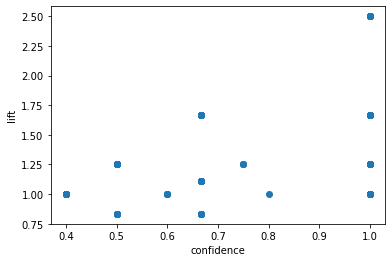

In [ ]:
rules = association_rules(frequent_itemsets, metric="support", min_threshold=0.1)

scores = rules[['confidence', 'lift']].values
print(scores)

x = rules['confidence'].values
y = rules['lift'].values

#print(x)
#print(y)
plt.scatter(x, y)
plt.xlabel('confidence')
plt.ylabel('lift')
plt.show()

In [ ]:
pareto = identify_pareto(scores)
print ('Pareto front index vales')
print ('Points on Pareto front: \n',pareto)

pareto_front = scores[pareto]
print ('\nPareto front scores')
print (pareto_front)

Pareto front index vales
Points on Pareto front: 
 [ 60  61  95  98 116 118 123 125 144 146 147 150 151 153 157 162 163 168
 173 176 178 179 183 184 185 186 190 191 193 196]

Pareto front scores
[[1.  2.5]
 [1.  2.5]
 [1.  2.5]
 [1.  2.5]
 [1.  2.5]
 [1.  2.5]
 [1.  2.5]
 [1.  2.5]
 [1.  2.5]
 [1.  2.5]
 [1.  2.5]
 [1.  2.5]
 [1.  2.5]
 [1.  2.5]
 [1.  2.5]
 [1.  2.5]
 [1.  2.5]
 [1.  2.5]
 [1.  2.5]
 [1.  2.5]
 [1.  2.5]
 [1.  2.5]
 [1.  2.5]
 [1.  2.5]
 [1.  2.5]
 [1.  2.5]
 [1.  2.5]
 [1.  2.5]
 [1.  2.5]
 [1.  2.5]]


In [ ]:
pareto_front_df = pd.DataFrame(pareto_front)
pareto_front_df.sort_values(0, inplace=True)
pareto_front = pareto_front_df.values

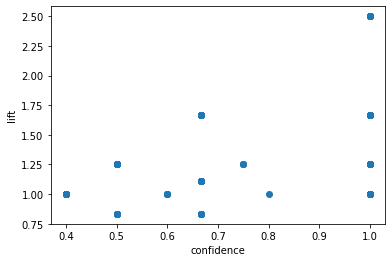

In [ ]:
x_all = scores[:, 0]
y_all = scores[:, 1]
x_pareto = pareto_front[:, 0]
y_pareto = pareto_front[:, 1]

plt.scatter(x_all, y_all)
plt.plot(x_pareto, y_pareto, color='r')
plt.xlabel('confidence')
plt.ylabel('lift')
plt.show()